<a href="https://colab.research.google.com/github/Jeevesh28/Fantasy-Football-Optimization/blob/main/Advolution%207.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**

Competetion conducted by International Management Institute (IMI), New Delhi on D2C Platform.

[Ultimate Analytics Competition - Advolution 7.0](https://dare2compete.com/competition/advolution-70-international-management-institute-imi-new-delhi-248452)

**Task:**

1. In this round, you get to experience how it feels to be a
Football manager.
2. We have to create a team consisting of 5 players in the
main team and a substitute team of 5 players,
respectively.
3. We are given a database with all attributes of players
from which we will need to choose your team.

**Constraints:**

1. We have to make sure that no two players are
selected from the same nationality or club as
provided in the dataset.
2. We have to include one left-footed player in the
playing squad (main team and the substitute team).
3. The main team should compulsorily consist of a
forward, a midfielder, a defender, a goalkeeper, and
the fifth player could belong to any of the positions of
your choice except goalkeeper.
4. The substitute team should only consist of players
having positions mentioned as (SUB / RES) as their
position in the dataset.
5. **Note:** The forward position players are mentioned as (
CF, RF, LF, ST, LS, RS, LW, RW) whereas the midfield
positions are ( LM, RM, CM, CAM, CDM, LAM, LCM, LDM,
RCM, RAM, RDM) and the defenders are mentioned as
(CB, LB, RB, LCB, RCB, LWB, RWB ) and goalkeepers are
mentioned as GK respectively.

### **Dataset Pre-Processing**

**Import libraries:**
* **Regular Data Science:** pandas, numpy
* **Plotting:** matplotlib, seaborn, plotly
* **Optimization:** PuLP

In [ ]:
%%capture
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install PuLP
from pulp import *

**Reading csv file:**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Competitions/Advolution 7.0/Advolution 7.0 Data.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value(In Millions),Wage(In Thousands),Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause(In Millions),DefensiveAwareness
0,0,Bruno Fernandes,26,Portugal,88.0,89,Manchester United,107.5,250.0,Right,3,3,4,High/ High,Unique,CAM,18,"Jan 30, 2020",2025,179cm,69kg,87,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70,89.0,78.0,66.0,87,90,91,87.0,NaN,73,65,12,14,15,8,14,CAM,88.0,206.9,72.0
1,1,L. Goretzka,26,Germany,NaN,88,FC Bayern München,93.0,140.0,Right,4,4,3,High/ Medium,Unique,LDM,8,"Jul 1, 2018",2026,189cm,82kg,75,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88,86.0,81.0,86.0,85,84,60,82.0,NaN,85,77,13,8,15,11,9,CM,NaN,160.4,74.0
2,2,L. Suárez,34,Uruguay,NaN,88,Atlético de Madrid,44.5,135.0,Right,5,4,3,High/ Medium,Unique,RS,9,"Sep 25, 2020",2022,182cm,83kg,80,93.0,NaN,NaN,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85,88.0,87.0,41.0,91,84,83,87.0,NaN,45,38,27,25,31,33,37,ST,NaN,91.2,42.0
3,3,K. De Bruyne,30,Belgium,91.0,91,Manchester City,125.5,350.0,Right,4,5,4,High/ High,Unique,RCM,17,"Aug 30, 2015",2025,181cm,70kg,94,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74,91.0,76.0,66.0,88,94,83,89.0,NaN,65,53,15,13,5,10,13,CM,91.0,232.2,68.0
4,4,M. Acuña,29,Argentina,84.0,84,Sevilla FC,37.0,45.0,Left,2,3,4,High/ High,Stocky (170-185),LB,19,"Sep 14, 2020",2024,172cm,69kg,87,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80,81.0,84.0,79.0,81,82,76,87.0,NaN,84,82,8,14,13,13,14,LB,84.0,77.7,80.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value(In Millions)', 'Wage(In Thousands)', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause(In Millions)',
       'DefensiveAwareness'],
      dtype='object')

**Filling missing values:**

In [ ]:
df.isna().sum()

Unnamed: 0                         0
Name                               0
Age                                0
Nationality                        0
Overall                          194
Potential                          0
Club                               0
Value(In Millions)                 0
Wage(In Thousands)                 0
Preferred Foot                     0
International Reputation           0
Weak Foot                          0
Skill Moves                        0
Work Rate                          0
Body Type                          0
Position                           0
Jersey Number                      0
Joined                          1215
Contract Valid Until              88
Height                             0
Weight                             0
Crossing                           0
Finishing                          3
HeadingAccuracy                   17
ShortPassing                      14
Volleys                           25
Dribbling                         27
C

In [ ]:
data = df.drop(columns=["Unnamed: 0", "International Reputation", "Weak Foot", "Skill Moves", "Work Rate", "Body Type", "Jersey Number", "Joined", "Contract Valid Until", "Height", "Weight", "Marking", "Best Overall Rating"], inplace=False)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value(In Millions),Wage(In Thousands),Preferred Foot,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Release Clause(In Millions),DefensiveAwareness
0,Bruno Fernandes,26,Portugal,88.0,89,Manchester United,107.5,250.0,Right,CAM,87,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70,89.0,78.0,66.0,87,90,91,87.0,73,65,12,14,15,8,14,CAM,206.9,72.0
1,L. Goretzka,26,Germany,NaN,88,FC Bayern München,93.0,140.0,Right,LDM,75,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88,86.0,81.0,86.0,85,84,60,82.0,85,77,13,8,15,11,9,CM,160.4,74.0
2,L. Suárez,34,Uruguay,NaN,88,Atlético de Madrid,44.5,135.0,Right,RS,80,93.0,NaN,NaN,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85,88.0,87.0,41.0,91,84,83,87.0,45,38,27,25,31,33,37,ST,91.2,42.0
3,K. De Bruyne,30,Belgium,91.0,91,Manchester City,125.5,350.0,Right,RCM,94,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74,91.0,76.0,66.0,88,94,83,89.0,65,53,15,13,5,10,13,CM,232.2,68.0
4,M. Acuña,29,Argentina,84.0,84,Sevilla FC,37.0,45.0,Left,LB,87,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80,81.0,84.0,79.0,81,82,76,87.0,84,82,8,14,13,13,14,LB,77.7,80.0


**Comparing Potential vs Overall:** this is done to get idea of how to fill the missing overall values based on the age (which is the most important feature when performance of a plyer reaches it's peak)

In [ ]:
comparison = data.copy(deep=True)
comparison.dropna(subset=['Overall'], inplace = True)
comparison['Difference'] = (comparison['Potential'] - comparison['Overall']) / comparison['Potential']

In [ ]:
fig = px.scatter(comparison, x='Age', y='Difference', color='Potential', hover_data=['Name'])
fig.show()

In [ ]:
comparison = comparison.groupby('Age')['Difference'].mean().reset_index()

In [ ]:
for i in range(len(data)):
  if pd.isna(data['Overall'][i]):
    data['Overall'][i] = round(data['Potential'][i] - (comparison[comparison['Age'] == data['Age'][i]].iloc[0]['Difference']) * data['Potential'][i])

In [ ]:
data.isna().sum()

Name                              0
Age                               0
Nationality                       0
Overall                           0
Potential                         0
Club                              0
Value(In Millions)                0
Wage(In Thousands)                0
Preferred Foot                    0
Position                          0
Crossing                          0
Finishing                         3
HeadingAccuracy                  17
ShortPassing                     14
Volleys                          25
Dribbling                        27
Curve                            23
FKAccuracy                        4
LongPassing                      22
BallControl                       4
Acceleration                     18
SprintSpeed                      14
Agility                           2
Reactions                         6
Balance                           3
ShotPower                         3
Jumping                           5
Stamina                     

**Heatmaps:** to get an idea how the different attributes are related to each other

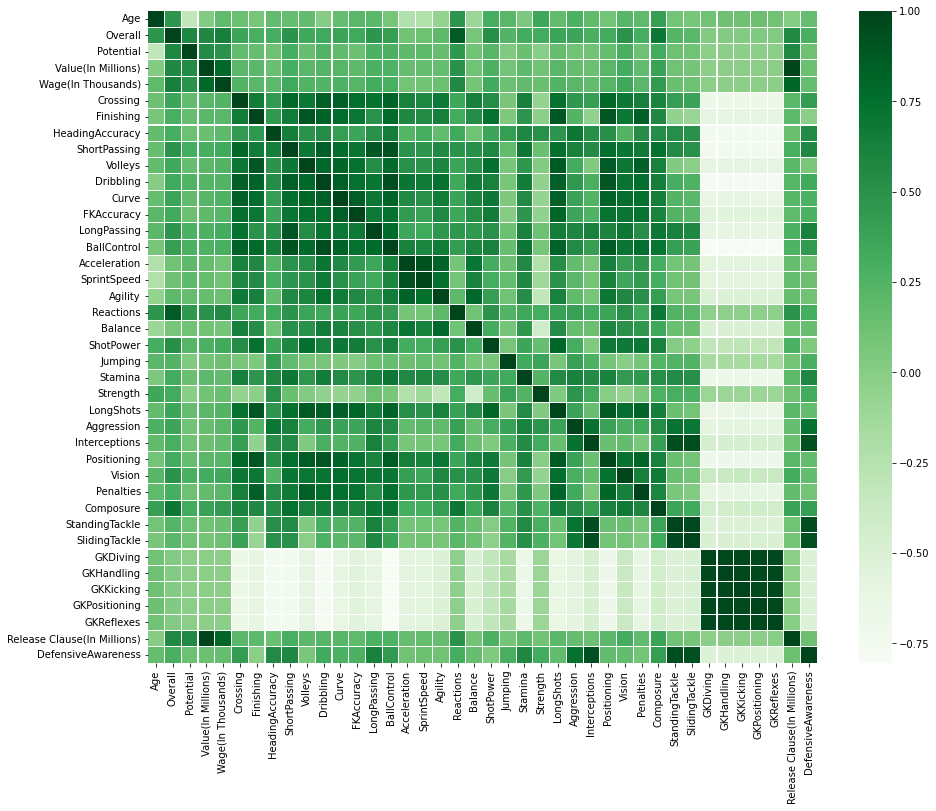

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), cmap="Greens", linewidths=0.1);

**Imputing missing values:**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10)
missing = data.copy(deep=True)
missing.drop(columns = ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Best Position'], inplace = True)
imputer.fit(missing)
missing[:] = imputer.transform(missing)

In [ ]:
data.drop(data.columns[data.columns.isin(missing.columns)],axis=1,inplace=True)
data = pd.concat([data, missing], axis = 1)
data.head()

,Name,Nationality,Club,Preferred Foot,Position,Best Position,Age,Overall,Potential,Value(In Millions),Wage(In Thousands),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(In Millions),DefensiveAwareness
0,Bruno Fernandes,Portugal,Manchester United,Right,CAM,CAM,26.0,88.0,89.0,107.5,250.0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,206.9,72.0
1,L. Goretzka,Germany,FC Bayern München,Right,LDM,CM,26.0,86.0,88.0,93.0,140.0,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,160.4,74.0
2,L. Suárez,Uruguay,Atlético de Madrid,Right,RS,ST,34.0,88.0,88.0,44.5,135.0,80.0,93.0,67.2,81.3,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,91.2,42.0
3,K. De Bruyne,Belgium,Manchester City,Right,RCM,CM,30.0,91.0,91.0,125.5,350.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,232.2,68.0
4,M. Acuña,Argentina,Sevilla FC,Left,LB,LB,29.0,84.0,84.0,37.0,45.0,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,77.7,80.0


In [ ]:
data.describe()

,Age,Overall,Potential,Value(In Millions),Wage(In Thousands),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(In Millions),DefensiveAwareness
count,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000
mean,25.632936,67.588268,72.573663,3.417801,11.480622,52.193278,48.705420,54.066789,61.294109,45.616321,58.618417,50.566826,44.980196,55.421039,61.364821,65.736419,65.840965,65.286037,63.543837,64.965500,60.608854,65.919725,64.244180,66.216682,49.941931,57.879957,47.980898,53.114513,56.367553,50.527284,61.034617,49.155209,46.821143,15.653712,15.472044,15.320929,15.532539,15.739872,6.505878,48.088818
std,4.991254,6.427689,5.656889,8.193880,21.505410,17.739336,19.360262,16.951129,13.616467,17.780379,17.878009,18.191141,17.524685,14.462332,15.634201,14.976648,14.707023,14.478391,8.574618,14.272579,12.927906,12.286834,15.545291,12.622370,19.038425,16.842687,20.813974,19.161693,13.361945,15.681385,11.377634,21.421917,21.145842,16.960893,16.248585,15.913019,16.526240,17.271216,15.786433,20.112126
min,16.000000,44.000000,46.000000,0.001000,0.050000,7.000000,3.000000,5.000000,8.000000,4.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,18.000000,28.000000,19.000000,12.000000,22.000000,13.000000,19.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,12.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.014000,3.000000
25%,22.000000,63.000000,69.000000,0.650000,2.000000,42.000000,34.000000,46.000000,57.000000,33.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,57.000000,58.000000,57.000000,52.000000,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,55.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.200000,31.000000
50%,25.000000,68.000000,72.000000,1.300000,4.000000,57.000000,53.000000,57.000000,64.000000,48.000000,64.000000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,68.000000,64.000000,67.000000,62.000000,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,62.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.300000,54.000000
75%,29.000000,72.000000,76.000000,2.600000,12.000000,65.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,75.000000,69.000000,75.000000,70.000000,74.000000,75.000000,75.000000,65.000000,70.000000,65.000000,66.000000,66.000000,62.000000,69.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,4.900000,65.000000
max,45.000000,93.000000,95.000000,194.000000,350.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,96.000000,94.000000,96.000000,95.000000,95.000000,97.000000,97.000000,94.000000,95.000000,93.000000,96.000000,95.000000,96.000000,96.000000,93.000000,95.000000,91.000000,92.000000,93.000000,92.000000,90.000000,373.500000,93.000000


### **Division of Dataset**

**Playing positions:** assigning playing to five categories (GK, DEF, MID, ATT, SUB)

In [ ]:
data["Position"].unique()

array(['CAM', 'LDM', 'RS', 'RCM', 'LB', 'RDM', 'LCM', 'SUB', 'LS', 'RM',
       'LCB', 'LM', 'RB', 'CDM', 'RW', 'LW', 'ST', 'CM', 'RF', 'LWB',
       'RAM', 'CF', 'RES', 'LF', 'RWB', 'CB', 'RCB', 'LAM', 'GK'],
      dtype=object)

In [ ]:
# goalkeeping positions
goal_pos = ['GK']

# defensive positions
def_pos = ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']

# midfield positions
mid_pos = ['LM', 'RM', 'CM', 'CAM', 'CDM', 'LAM', 'LCM', 'LDM', 'RCM', 'RAM', 'RDM']

# attacking positions
att_pos = ['CF', 'RF', 'LF', 'ST', 'LS', 'RS', 'LW', 'RW']

# substitute positions
sub_pos = ['SUB', 'RES']

In [ ]:
data['Pos'] = ''

In [ ]:
for i in range(len(data)):
  if data['Position'][i] in goal_pos:
    data['Pos'][i] = 'GK'
  if data['Position'][i] in def_pos:
    data['Pos'][i] = 'DEF'
  if data['Position'][i] in mid_pos:
    data['Pos'][i] = 'MID'
  if data['Position'][i] in att_pos:
    data['Pos'][i] = 'FWD'
  if data['Position'][i] in sub_pos:
    data['Pos'][i] = 'SUB'

**Data preparation for optimization model:**

In [ ]:
data_sub = data[data['Pos'].isin(sub_pos)]
data_sub = data_sub.reset_index(drop=True)

data['Pos'] = data['Pos'].replace('SUB', np.nan)
data_main = data.dropna(subset=['Pos'])
data_main = data_main.reset_index(drop=True)

In [ ]:
for i in range(len(data_sub)):
  if data_sub['Best Position'][i] in goal_pos:
    data_sub['Pos'][i] = 'GK'
  if data_sub['Best Position'][i] in def_pos:
    data_sub['Pos'][i] = 'DEF'
  if data_sub['Best Position'][i] in mid_pos:
    data_sub['Pos'][i] = 'MID'
  if data_sub['Best Position'][i] in att_pos:
    data_sub['Pos'][i] = 'FWD'

**Main team players:**

In [ ]:
data_main.head()

,Name,Nationality,Club,Preferred Foot,Position,Best Position,Age,Overall,Potential,Value(In Millions),Wage(In Thousands),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(In Millions),DefensiveAwareness,Pos
0,Bruno Fernandes,Portugal,Manchester United,Right,CAM,CAM,26.0,88.0,89.0,107.5,250.0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,206.9,72.0,MID
1,L. Goretzka,Germany,FC Bayern München,Right,LDM,CM,26.0,86.0,88.0,93.0,140.0,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,160.4,74.0,MID
2,L. Suárez,Uruguay,Atlético de Madrid,Right,RS,ST,34.0,88.0,88.0,44.5,135.0,80.0,93.0,67.2,81.3,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,91.2,42.0,FWD
3,K. De Bruyne,Belgium,Manchester City,Right,RCM,CM,30.0,91.0,91.0,125.5,350.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,232.2,68.0,MID
4,M. Acuña,Argentina,Sevilla FC,Left,LB,LB,29.0,84.0,84.0,37.0,45.0,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,77.7,80.0,DEF


**Subsitute team players:**


In [ ]:
data_sub.head()

,Name,Nationality,Club,Preferred Foot,Position,Best Position,Age,Overall,Potential,Value(In Millions),Wage(In Thousands),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause(In Millions),DefensiveAwareness,Pos
0,G. Wijnaldum,Netherlands,Paris Saint-Germain,Right,SUB,CM,30.0,84.0,84.0,40.5,115.0,72.0,75.0,78.0,87.0,73.0,85.0,78.0,73.0,81.0,88.0,78.0,76.0,84.0,86.0,88.0,78.0,81.0,93.0,74.0,73.0,75.0,80.0,79.0,79.0,74.0,86.0,80.0,70.0,16.0,6.0,14.0,12.0,6.0,74.9,79.0,MID
1,E. Can,Germany,Borussia Dortmund,Right,SUB,CDM,27.0,82.0,83.0,35.0,72.0,69.0,76.0,82.0,83.0,71.0,82.0,77.0,64.0,83.0,79.0,67.0,87.0,72.0,81.0,75.0,85.0,87.0,88.0,86.0,81.0,88.0,84.0,76.0,79.0,60.0,79.0,87.0,86.0,14.0,8.0,8.0,13.0,11.0,62.1,81.0,MID
2,Alex Telles,Brazil,Manchester United,Left,SUB,LB,28.0,82.0,82.0,27.5,130.0,86.0,63.0,68.0,82.0,62.0,77.0,87.0,79.0,81.0,80.0,81.0,84.0,75.0,81.0,70.0,87.0,81.0,85.0,65.0,83.0,76.0,79.0,75.0,78.0,81.0,77.0,78.0,76.0,13.0,8.0,12.0,11.0,14.0,50.9,77.0,DEF
3,M. Sabitzer,Austria,FC Bayern München,Right,SUB,CM,27.0,84.0,85.0,48.0,110.0,74.0,81.0,60.0,84.0,82.0,79.0,76.0,78.0,81.0,82.0,75.0,81.0,75.0,86.0,80.0,88.0,71.0,85.0,76.0,88.0,77.0,66.0,83.0,83.0,72.0,80.0,70.0,59.0,11.0,13.0,14.0,15.0,13.0,82.8,71.0,MID
4,A. Vidal,Chile,Inter,Right,SUB,CM,34.0,81.0,81.0,12.0,105.0,76.0,75.0,81.0,81.0,78.0,76.0,76.0,68.0,79.0,83.0,66.0,65.0,81.0,81.0,77.0,84.0,82.0,78.0,80.0,81.0,92.0,82.0,78.0,80.0,81.0,80.0,84.0,83.0,4.0,2.0,4.0,2.0,4.0,20.4,80.0,MID


### **Optimization Model**

**Team formation:** GK - DEF - MID - FWD

In [ ]:
formation = '1-2-1-1'
formation = formation.split('-')
formation = [int(i) for i in formation]
pos_available = {'GK': formation[0], 'DEF': formation[1], 'MID': formation[2], 'FWD': formation[3]}

**Main Team:**

* **Variables:**

In [ ]:
# Helper Variables
POS = data_main['Pos'].unique()
CLUB = data_main['Club'].unique()
NATIONALITY = data_main['Nationality'].unique()

# Initialize Variables
names = [data_main['Name'][i] for i in data_main.index]
teams = [data_main['Club'][i] for i in data_main.index]
positions = [data_main['Pos'][i] for i in data_main.index]
rating = [data_main['Overall'][i] for i in data_main.index]
countries = [data_main['Nationality'][i] for i in data_main.index]
foot = [data_main['Preferred Foot'][i] for i in data_main.index]
players = [LpVariable("Player_" + str(i), cat="Binary") for i in data_main.index]

* **Problem:**

In [ ]:
%%capture
prob_main = LpProblem("Player choices for main team", LpMaximize)

* **Objective:**

In [ ]:
prob_main += lpSum(players[i] * rating[i] for i in range(len(data_main))) 

* **Constraints:**

In [ ]:
# Left-footed
prob_main += lpSum(players[i] for i in range(len(data_main)) if foot[i] == 'Left') >= 1

# Position Limit
for pos in POS:
  prob_main += lpSum(players[i] for i in range(len(data_main)) if positions[i] == pos) <= pos_available[pos] 

# Club Limit
for club in CLUB:
  prob_main += lpSum(players[i] for i in range(len(data_main)) if teams[i] == club) <= 1 

# Nationality Limit
for nations in NATIONALITY:
  prob_main += lpSum(players[i] for i in range(len(data_main)) if countries[i] == nations) <= 1

* **Solution:**

In [ ]:
solution_main = prob_main.solve()

In [ ]:
print(str(LpStatus[solution_main])+ "; Total rating of main team = "+ str(pulp.value(prob_main.objective)))

Optimal; Total rating of main team = 452.0


* **Players:**

In [ ]:
main_team = pd.DataFrame(columns=['Name', 'Club', 'Nationality', 'Position', 'Rating'])

In [ ]:
for v in prob_main.variables():
  if v.varValue != 0:
    name = data_main.Name[int(v.name.split("_")[1])]
    club = data_main.Club[int(v.name.split("_")[1])]
    nation = data_main.Nationality[int(v.name.split("_")[1])]
    position = data_main.Pos[int(v.name.split("_")[1])]
    rating = data_main.Overall[int(v.name.split("_")[1])]
    player = pd.Series(dict(zip(main_team.columns, [name, club, nation, position, rating])))
    main_team = main_team.append(player, ignore_index = True)

In [ ]:
main_team

,Name,Club,Nationality,Position,Rating
0,R. Varane,Manchester United,France,DEF,88.0
1,V. van Dijk,Liverpool,Netherlands,DEF,89.0
2,L. Messi,Paris Saint-Germain,Argentina,FWD,93.0
3,K. De Bruyne,Manchester City,Belgium,MID,91.0
4,J. Oblak,Atlético de Madrid,Slovenia,GK,91.0


**Substitute Team:**

* **Variables:**

In [ ]:
# Helper Variables
POS = data_sub['Pos'].unique()
CLUB = data_sub['Club'].unique()
NATIONALITY = data_sub['Nationality'].unique()

# Initialize Variables
names = [data_sub['Name'][i] for i in data_sub.index]
teams = [data_sub['Club'][i] for i in data_sub.index]
positions = [data_sub['Pos'][i] for i in data_sub.index]
rating = [data_sub['Overall'][i] for i in data_sub.index]
countries = [data_sub['Nationality'][i] for i in data_sub.index]
foot = [data_sub['Preferred Foot'][i] for i in data_sub.index]
players = [LpVariable("Player_" + str(i), cat="Binary") for i in data_sub.index]

* **Problem:**

In [ ]:
%%capture
prob_sub = LpProblem("Player choices for subsitute team", LpMaximize)

* **Objective:**

In [ ]:
prob_sub += lpSum(players[i] * rating[i] for i in range(len(data_sub))) 

* **Constraints:**

In [ ]:
# Left-footed
prob_sub += lpSum(players[i] for i in range(len(data_sub)) if foot[i] == 'Left') >= 1

# Position Limit
for pos in POS:
  prob_sub += lpSum(players[i] for i in range(len(data_sub)) if positions[i] == pos) <= pos_available[pos] 

# Club Limit
for club in CLUB:
  if(club in main_team['Club'].values):
      prob_sub += lpSum(players[i] for i in range(len(data_sub)) if teams[i] == club) == 0 
      continue
  prob_sub += lpSum(players[i] for i in range(len(data_sub)) if teams[i] == club) <= 1 

# Nationality Limit
for nations in NATIONALITY:
  if(nations in main_team['Nationality'].values):
      prob_sub += lpSum(players[i] for i in range(len(data_sub)) if countries[i] == nations) == 0
      continue
  prob_sub += lpSum(players[i] for i in range(len(data_sub)) if countries[i] == nations) <= 1

* **Solution:**

In [ ]:
# Solve the problem
solution_sub = prob_sub.solve()

In [ ]:
print(str(LpStatus[solution_sub])+ "; Total rating of subsitute team = "+ str(pulp.value(prob_sub.objective)))

Optimal; Total rating of subsitute team = 421.0


* **Players:**

In [ ]:
sub_team = pd.DataFrame(columns=['Name', 'Club', 'Nationality', 'Position', 'Rating'])

In [ ]:
for v in prob_sub.variables():
  if v.varValue != 0:
    name = data_sub.Name[int(v.name.split("_")[1])]
    club = data_sub.Club[int(v.name.split("_")[1])]
    nation = data_sub.Nationality[int(v.name.split("_")[1])]
    position = data_sub.Pos[int(v.name.split("_")[1])]
    rating = data_sub.Overall[int(v.name.split("_")[1])]
    player = pd.Series(dict(zip(main_team.columns, [name, club, nation, position, rating])))
    sub_team = sub_team.append(player, ignore_index = True)

In [ ]:
sub_team

,Name,Club,Nationality,Position,Rating
0,G. Chiellini,Juventus,Italy,DEF,86.0
1,Z. Ibrahimović,AC Milan,Sweden,FWD,84.0
2,15 Xavi,FC Barcelona,Spain,MID,86.0
3,J. Boateng,Olympique Lyonnais,Germany,DEF,83.0
4,J. Pavlenka,SV Werder Bremen,Czech Republic,GK,82.0


### **Visualizations**

* **Comparison of preferred foot:**

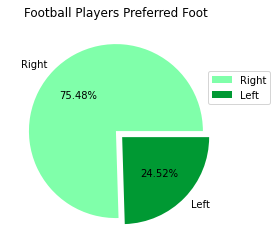

In [ ]:
# (Right, Left) 
preferred_foot_labels = data["Preferred Foot"].value_counts().index 

# (Right Values, Left Values)
preferred_foot_values = data["Preferred Foot"].value_counts().values 
explode = (0, 0.1)

colors = ['#80ffaa','#009933']
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%', colors = colors)
plt.title('Football Players Preferred Foot')
plt.legend(bbox_to_anchor=(0.9,0.8))
plt.show()

* **Comparison of playing position:**

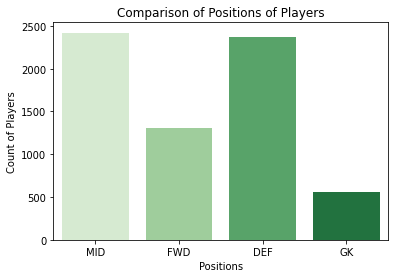

In [ ]:
ax = sns.countplot(x = 'Pos', data = data, palette = 'Greens')
ax.set_xlabel(xlabel = 'Positions')
ax.set_ylabel(ylabel = 'Count of Players')
ax.set_title(label = 'Comparison of Positions of Players')
plt.show()

* **Distribution of wages of players:**

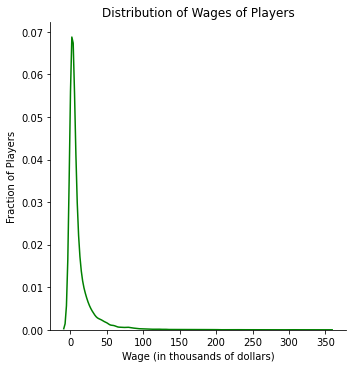

In [ ]:
sns.displot(data['Wage(In Thousands)'], color = 'green', kind = 'kde')
plt.xlabel('Wage (in thousands of dollars)')
plt.ylabel('Fraction of Players')
plt.title('Distribution of Wages of Players')
plt.show()

* **Distribution of value of players:**

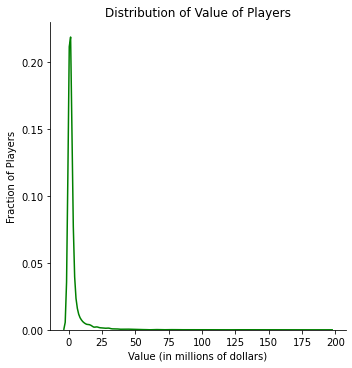

In [ ]:
sns.displot(data['Value(In Millions)'], color = 'green', kind = 'kde')
plt.xlabel('Value (in millions of dollars)')
plt.ylabel('Fraction of Players')
plt.title('Distribution of Value of Players')
plt.show()

* **Distribution of ages of players:**

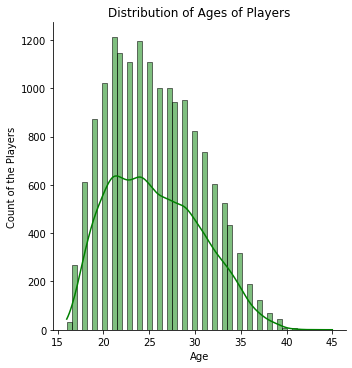

In [ ]:
sns.displot(data['Age'], color = 'green', kde = True)
plt.xlabel('Age')
plt.ylabel('Count of the Players')
plt.title('Distribution of Ages of Players')
plt.show()

* **Distribution of rating of players:**

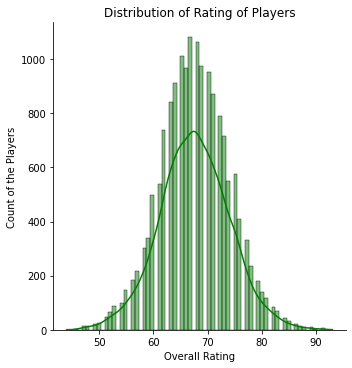

In [ ]:
sns.displot(data['Overall'], color = 'green', kde = True)
plt.xlabel('Overall Rating')
plt.ylabel('Count of the Players')
plt.title('Distribution of Rating of Players')
plt.show()

* **Comparison of rating and age wrt preferred foot:**

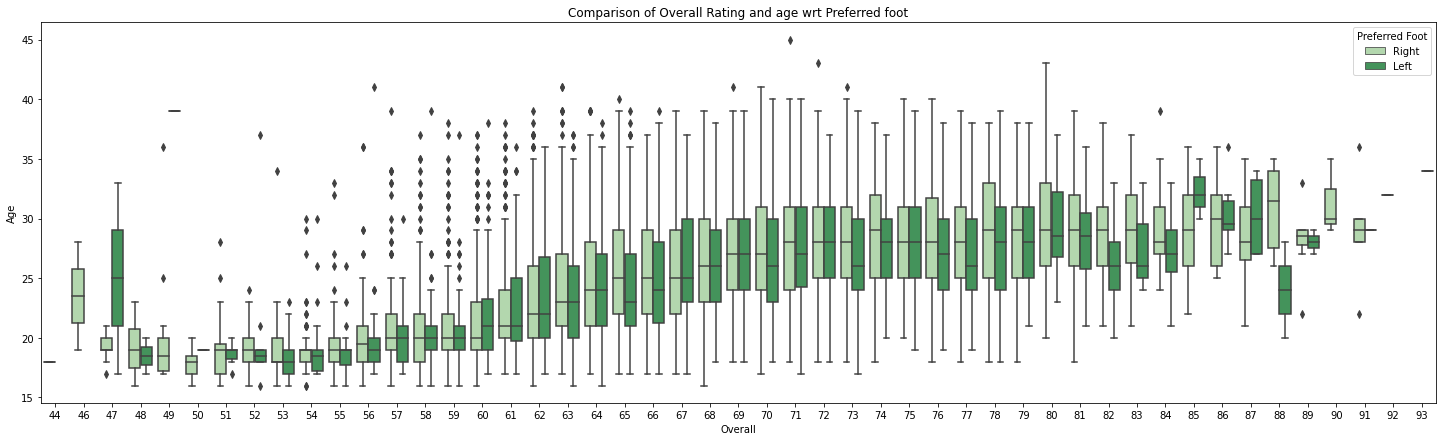

In [ ]:
plt.figure(figsize=(25,7))
data = data.astype({'Overall': int})
sns.boxplot(data = data, x = 'Overall', y = 'Age', hue = 'Preferred Foot', palette = 'Greens')
plt.title('Comparison of Overall Rating and age wrt Preferred foot')
plt.show()

* **Distribution of rating of some popular clubs:**

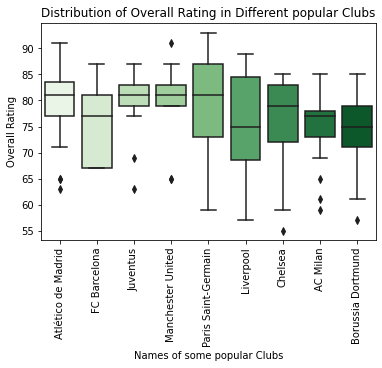

In [ ]:
some_clubs = ('Manchestar City', 'Chelsea', 'Liverpool', 'Manchester United', 'FC Barcelona', 'Real Madrid',
              'Atlético de Madrid', 'Paris Saint-Germain', 'Juventus', 'AC Milan', 'FC Bayern', 'Borussia Dortmund' )

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'Greens')
ax.set_xlabel(xlabel = 'Names of some popular Clubs')
ax.set_ylabel(ylabel = 'Overall Rating')
ax.set_title(label = 'Distribution of Overall Rating in Different popular Clubs')
plt.xticks(rotation = 90)
plt.show()

* **Distribution of ages of some popular clubs:**

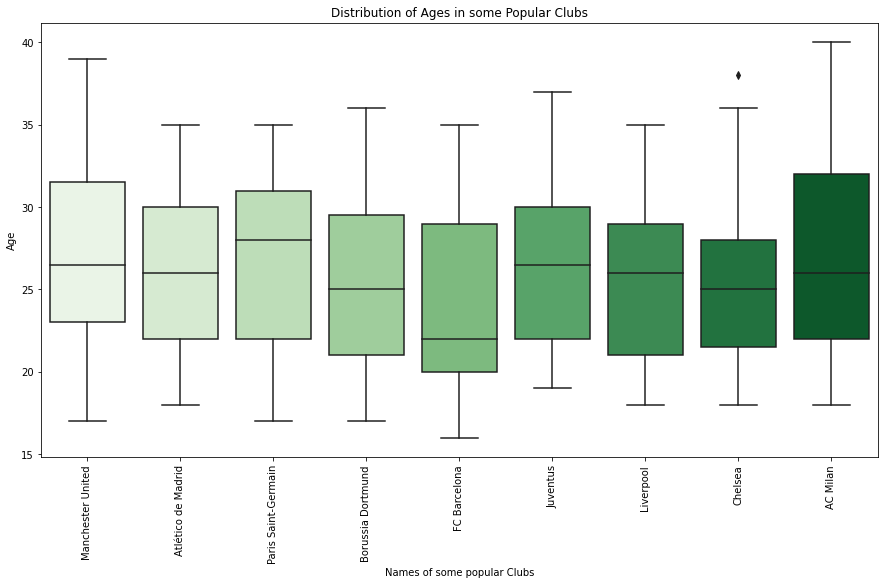

In [ ]:
some_clubs = ('Manchestar City', 'Chelsea', 'Liverpool', 'Manchester United', 'FC Barcelona', 'Real Madrid',
              'Atlético de Madrid', 'Paris Saint-Germain', 'Juventus', 'AC Milan', 'FC Bayern', 'Borussia Dortmund' )

data_club = data.loc[data['Club'].isin(some_clubs) & data['Age']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = 'Club', y = 'Age', data = data_club, palette = 'Greens')
ax.set_xlabel(xlabel = 'Names of some popular Clubs')
ax.set_ylabel(ylabel = 'Age')
ax.set_title(label = 'Distribution of Ages in some Popular Clubs')
plt.xticks(rotation = 90)
plt.show()

* **Most important attributes for playing positions:**

In [ ]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Penalties')

# Top five features for every position in football
for i, val in data.groupby(data['Best Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}, {}'.format(i, *tuple(val.nlargest(5).index)))

Position CAM: Agility, Balance, Acceleration, BallControl, Dribbling
Position CB: Jumping, Aggression, HeadingAccuracy, Interceptions, Composure
Position CDM: Aggression, BallControl, Interceptions, LongPassing, Jumping
Position CF: BallControl, Dribbling, Agility, Balance, Finishing
Position CM: BallControl, LongPassing, Balance, Agility, Dribbling
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling, GKKicking
Position LB: Acceleration, Balance, Agility, Jumping, Crossing
Position LM: Acceleration, Agility, Balance, Dribbling, BallControl
Position LW: Agility, Acceleration, Balance, Dribbling, BallControl
Position LWB: Acceleration, Balance, Agility, Jumping, Crossing
Position RB: Acceleration, Agility, Balance, Jumping, Aggression
Position RM: Acceleration, Agility, Balance, Dribbling, BallControl
Position RW: Acceleration, Agility, Balance, Dribbling, BallControl
Position RWB: Acceleration, Agility, Balance, Jumping, Dribbling
Position ST: Jumping, Acceleration, Finishing, 

* **Radar charts visualization for important attributes for playing positions:**

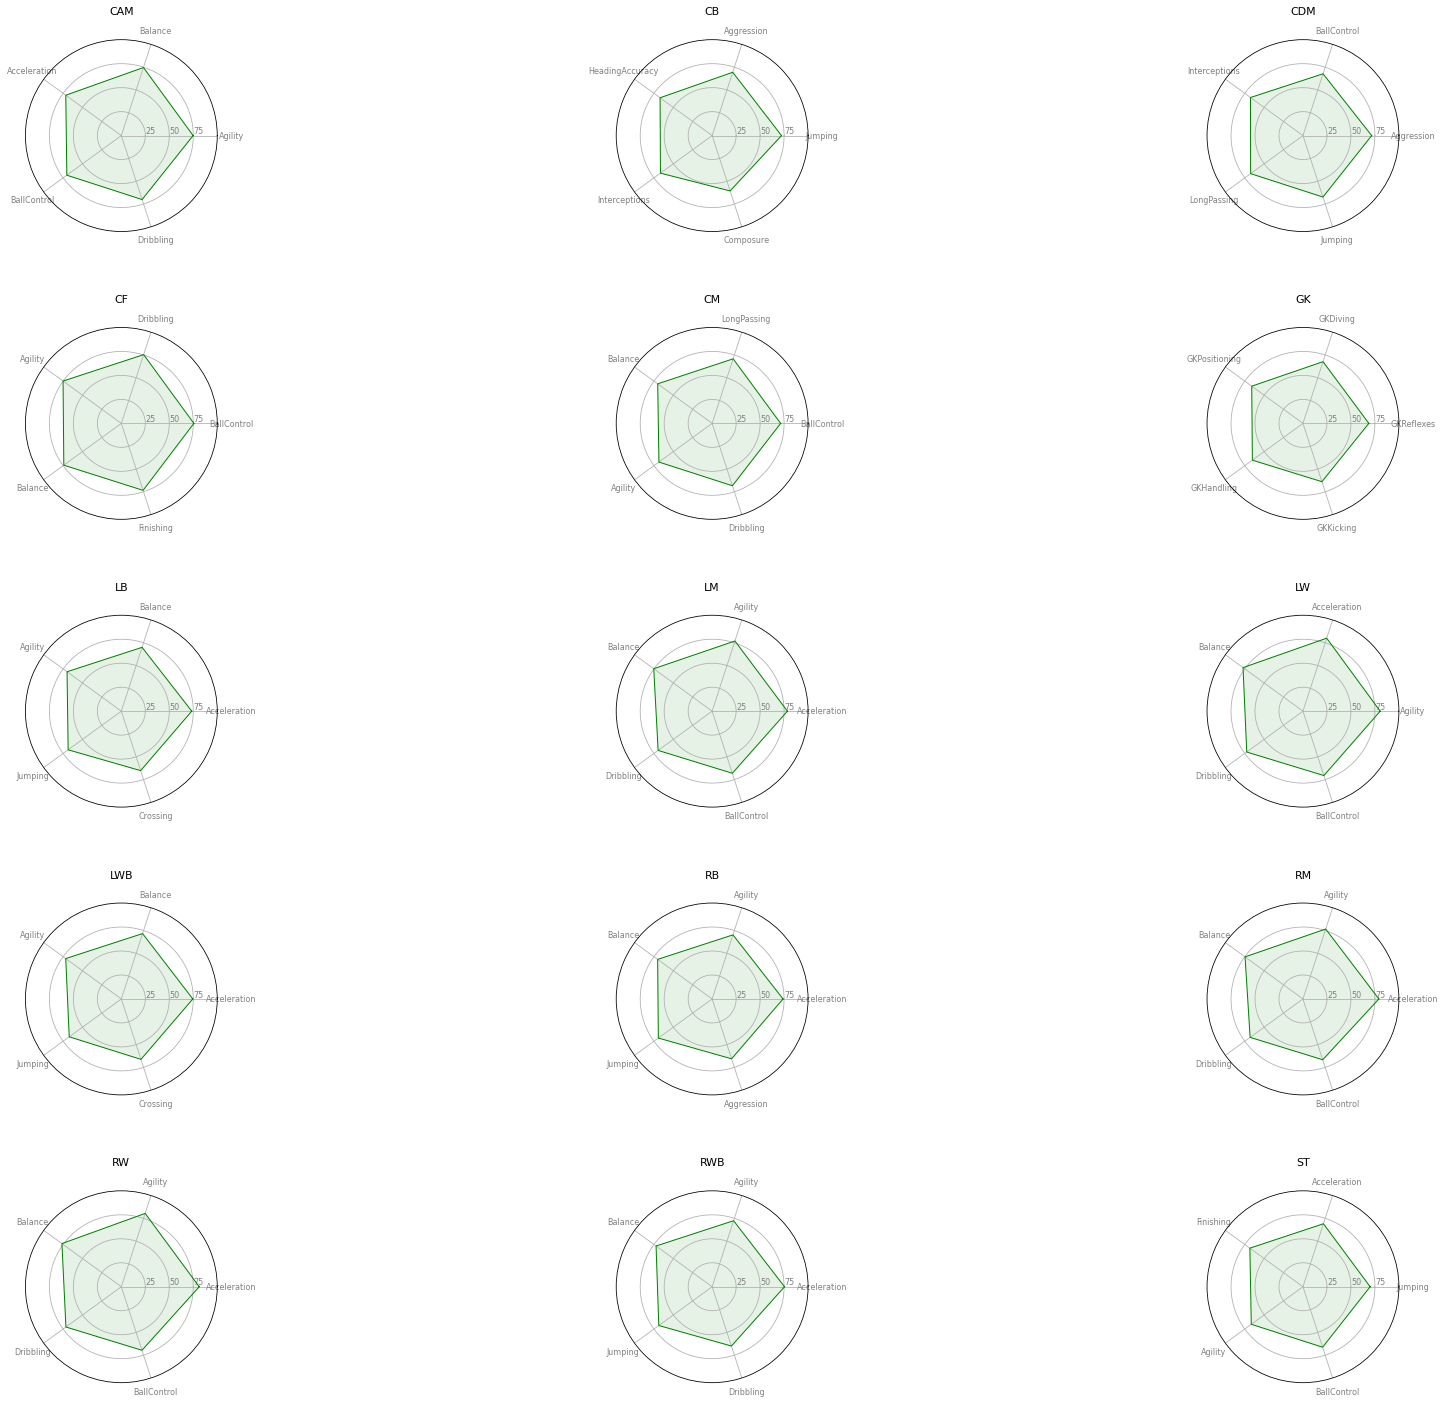

In [ ]:
from math import pi

idx = 1
plt.figure(figsize=(30,30))
for position_name, features in data.groupby(data['Best Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=8)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = 'g')

    # Fill area
    ax.fill(angles, values, 'g', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

* **Most important attributes for playing position:**

In [ ]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Penalties')

# Top five features for every position in football
for i, val in data.groupby(data['Pos'])[player_features].mean().iterrows():
    if i == 'SUB':
      continue 
    print('Position {}: {}, {}, {}, {}, {}'.format(i, *tuple(val.nlargest(5).index)))

Position DEF: Jumping, Aggression, Interceptions, Acceleration, HeadingAccuracy
Position FWD: Acceleration, Agility, BallControl, Finishing, Dribbling
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling, GKKicking
Position MID: Agility, Balance, BallControl, Acceleration, Dribbling


* **Radar chart comparison of selected players:**

**1. Forwards:**

In [ ]:
import plotly.graph_objects as go

a = data[data["Name"] == "L. Messi"]
b = data[data["Name"] == "Z. Ibrahimović"]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        name = a.Name.values[0],
        r = [a['Acceleration'].values[0], a['Agility'].values[0], a['BallControl'].values[0], a['Finishing'].values[0], a['Dribbling'].values[0], a['Acceleration'].values[0]],
        theta = ['Acceleration', 'Agility', 'BallControl', 'Finishing', 'Dribbling', 'Acceleration'],
        ))

fig.add_trace(go.Scatterpolar(
        name = b.Name.values[0],
        r = [b['Acceleration'].values[0], b['Agility'].values[0], b['BallControl'].values[0], b['Finishing'].values[0], b['Dribbling'].values[0], b['Acceleration'].values[0]],
        theta = ['Acceleration', 'Agility', 'BallControl', 'Finishing', 'Dribbling', 'Acceleration'],
        ))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [0, 100])),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.Name.values[0], b.Name.values[0]))

fig.show()

**2. Midfielders:**

In [ ]:
import plotly.graph_objects as go

a = data[data["Name"] == "K. De Bruyne"]
b = data[data["Name"] == "15\xa0Xavi"]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        name = a.Name.values[0],
        r = [a['Agility'].values[0], a['Balance'].values[0], a['BallControl'].values[0], a['Acceleration'].values[0], a['Dribbling'].values[0], a['Agility'].values[0]],
        theta = ['Agility', 'Balance', 'BallControl', 'Acceleration', 'Dribbling', 'Agility'],
        ))

fig.add_trace(go.Scatterpolar(
        name = b.Name.values[0],
        r = [b['Agility'].values[0], b['Balance'].values[0], b['BallControl'].values[0], b['Acceleration'].values[0], b['Dribbling'].values[0], b['Agility'].values[0]],
        theta = ['Agility', 'Balance', 'BallControl', 'Acceleration', 'Dribbling', 'Agility'],
        ))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [0, 100])),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.Name.values[0], b.Name.values[0]))

fig.show()

**3. Defenders:**

In [ ]:
import plotly.graph_objects as go

a = data[data["Name"] == "V. van Dijk"]
b = data[data["Name"] == "R. Varane"]
c = data[data["Name"] == "G. Chiellini"]
d = data[data["Name"] == "J. Boateng"]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        name = a.Name.values[0],
        r = [a['Jumping'].values[0], a['Aggression'].values[0], a['Interceptions'].values[0], a['Acceleration'].values[0], a['HeadingAccuracy'].values[0], a['Jumping'].values[0]],
        theta = ['Jumping', 'Aggression', 'Interceptions', 'Acceleration', 'HeadingAccuracy', 'Jumping'],
        ))

fig.add_trace(go.Scatterpolar(
        name = b.Name.values[0],
        r = [b['Jumping'].values[0], b['Aggression'].values[0], b['Interceptions'].values[0], b['Acceleration'].values[0], b['HeadingAccuracy'].values[0], b['Jumping'].values[0]],
        theta = ['Jumping', 'Aggression', 'Interceptions', 'Acceleration', 'HeadingAccuracy', 'Jumping'],
        ))

fig.add_trace(go.Scatterpolar(
        name = c.Name.values[0],
        r = [c['Jumping'].values[0], c['Aggression'].values[0], c['Interceptions'].values[0], c['Acceleration'].values[0], c['HeadingAccuracy'].values[0], c['Jumping'].values[0]],
        theta = ['Jumping', 'Aggression', 'Interceptions', 'Acceleration', 'HeadingAccuracy', 'Jumping'],
        ))

fig.add_trace(go.Scatterpolar(
        name = d.Name.values[0],
        r = [d['Jumping'].values[0], d['Aggression'].values[0], d['Interceptions'].values[0], d['Acceleration'].values[0], d['HeadingAccuracy'].values[0], d['Jumping'].values[0]],
        theta = ['Jumping', 'Aggression', 'Interceptions', 'Acceleration', 'HeadingAccuracy', 'Jumping'],
        ))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [0, 100])),
  showlegend = True,
  title = "{} vs {} vs {} vs {} Stats Comparison".format(a.Name.values[0], b.Name.values[0], c.Name.values[0], d.Name.values[0]))

fig.show()

**4. Goalkeepers:**

In [ ]:
import plotly.graph_objects as go

a = data[data["Name"] == "J. Oblak"]
b = data[data["Name"] == "J. Pavlenka"]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        name = a.Name.values[0],
        r = [a['GKReflexes'].values[0], a['GKDiving'].values[0], a['GKPositioning'].values[0], a['GKHandling'].values[0], a['GKKicking'].values[0], a['GKReflexes'].values[0]],
        theta = ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking', 'GKReflexes'],
        ))

fig.add_trace(go.Scatterpolar(
        name = b.Name.values[0],
        r = [b['GKReflexes'].values[0], b['GKDiving'].values[0], b['GKPositioning'].values[0], b['GKHandling'].values[0], b['GKKicking'].values[0], b['GKReflexes'].values[0]],
        theta = ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking', 'GKReflexes'],
        ))

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [0, 100])),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.Name.values[0], b.Name.values[0]))

fig.show()

* **Highest rated players in respective positions:**

In [ ]:
# Graph the top players by position. Variable position must be a list and num_players must be an integer
def graph_top_by_position(position, column1, column2, num_of_players):

    # create a dictionary to retrive the corresponding value from position argument
    lists = {"goalkeepers":goal_pos, "defenders":def_pos, "midfielders":mid_pos, "attackers":att_pos}
    
    # DataFrame of top players
    top_players = data[data["Best Position"].isin(lists.get(position))]
    top_players.sort_values(["Overall"], ascending=False, inplace=True)
    top_players = top_players.head(num_of_players)
    
    # DataFrame columns converted to lists
    names = top_players["Name"].to_list()
    rating = top_players[column1].to_list()
    value = top_players[column2].to_list()

    names.reverse()
    rating.reverse()
    value.reverse()

    # Plotting
    fig, axs = plt.subplots(2, figsize=(7, 7))
    fig.suptitle("Top "+str(num_of_players)+" "+position)
    axs[0].set_xlabel("Overall rating")
    axs[0].set_ylabel("Player name")
    axs[1].set_xlabel("Market value (in millions of dollars)")
    axs[1].set_ylabel("Player name")
    ax1 = axs[0].barh(names, width=rating)
    ax2 = axs[1].barh(names, width=value)
    colors = ['#80ffaa', '#4dff88', '#1aff66', '#00cc44', '#009933']
    for x in range(5):
        ax1[x].set_color(colors[x])
        ax2[x].set_color(colors[x])
    plt.plot();

**1. Goalkeepers:**

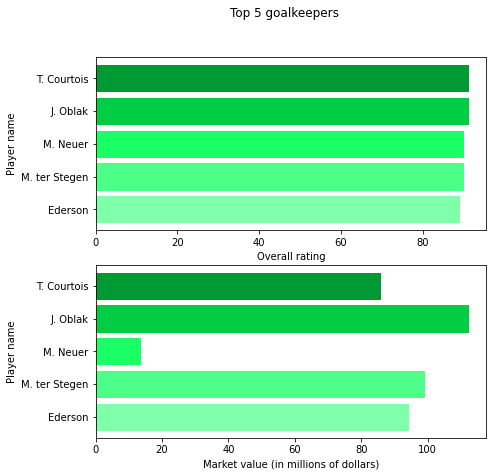

In [ ]:
graph_top_by_position("goalkeepers", "Overall", "Value(In Millions)", 5);

**2. Defenders:**

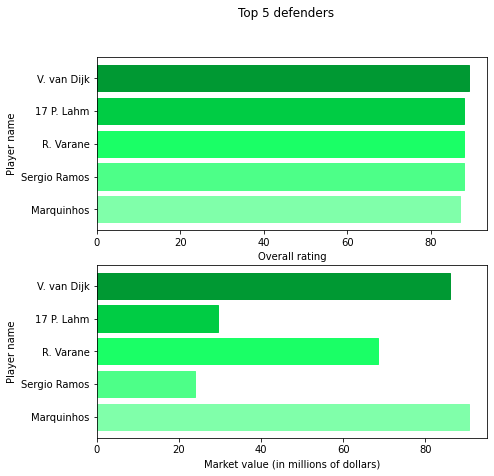

In [ ]:
graph_top_by_position("defenders", "Overall", "Value(In Millions)", 5)

**3. Defenders:**

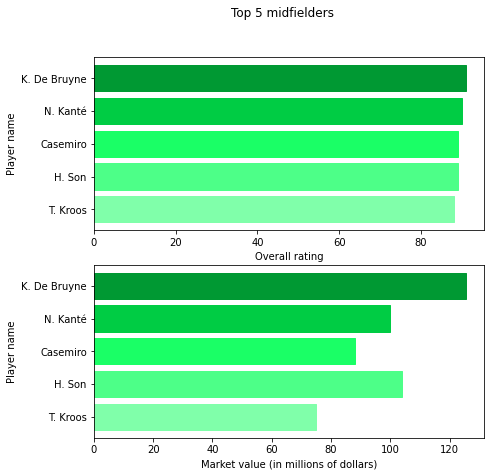

In [ ]:
graph_top_by_position("midfielders", "Overall", "Value(In Millions)", 5)

**4. Forwards:**

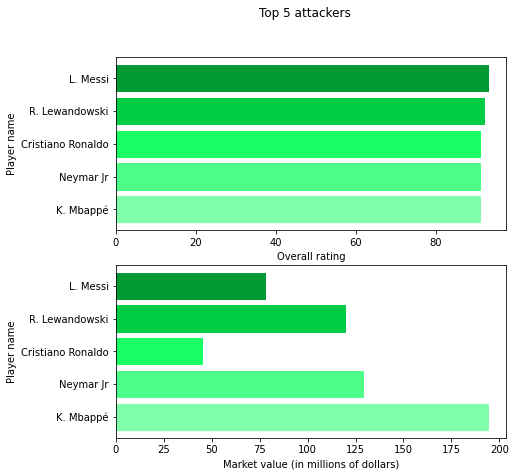

In [ ]:
graph_top_by_position("attackers", "Overall", "Value(In Millions)", 5)

* **Top clubs with the best average overall ratings:**

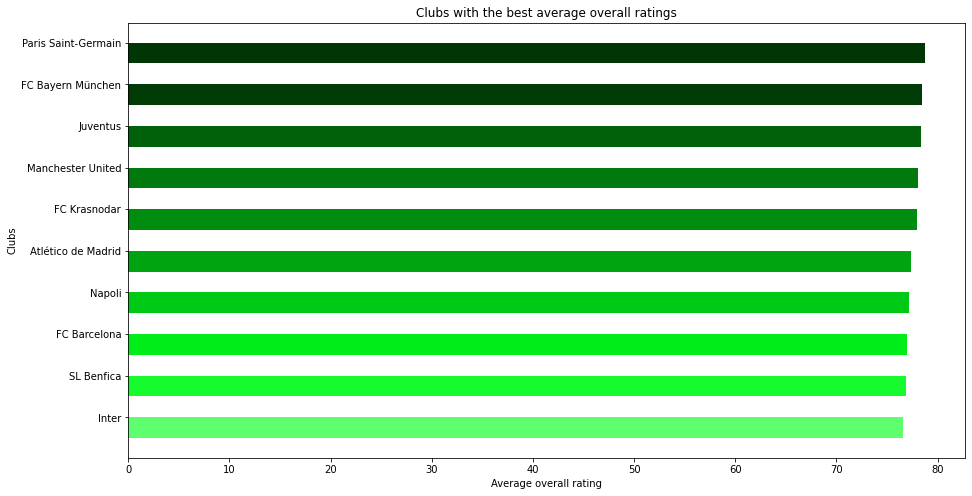

In [ ]:
# Create a new DataFrame of top clubs with the best average overall ratings
top_clubs_overall = data.groupby("Club",as_index=False)["Overall"].mean().sort_values("Overall", ascending=False).head(10)

# Plotting
colors = ["#003606","#003B06","#00610A","#00790D","#008C0E","#00A411","#00C915","#00ED19","#16FB2D","#5EFE6F"]
plt.barh("Club",width="Overall",height=0.5, data=top_clubs_overall,align="edge", color=colors)
plt.gca().invert_yaxis()
plt.title("Clubs with the best average overall ratings")
plt.ylabel("Clubs")
plt.xlabel("Average overall rating");

* **Top nations with the best average overall ratings:**

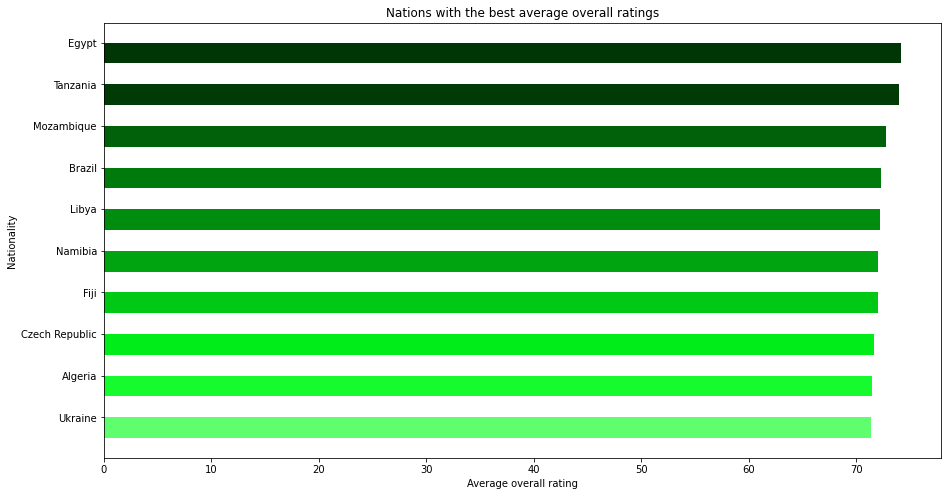

In [ ]:
# Create a new DataFrame of top nations with the best average overall ratings
top_nations_overall = data.groupby("Nationality",as_index=False)["Overall"].mean().sort_values("Overall", ascending=False).head(10)

# Plotting
colors = ["#003606","#003B06","#00610A","#00790D","#008C0E","#00A411","#00C915","#00ED19","#16FB2D","#5EFE6F"]
plt.barh("Nationality",width="Overall",height=0.5, data=top_nations_overall,align="edge", color=colors)
plt.gca().invert_yaxis()
plt.title("Nations with the best average overall ratings")
plt.ylabel("Nationality")
plt.xlabel("Average overall rating");

* **Top clubs with most expensive players:**

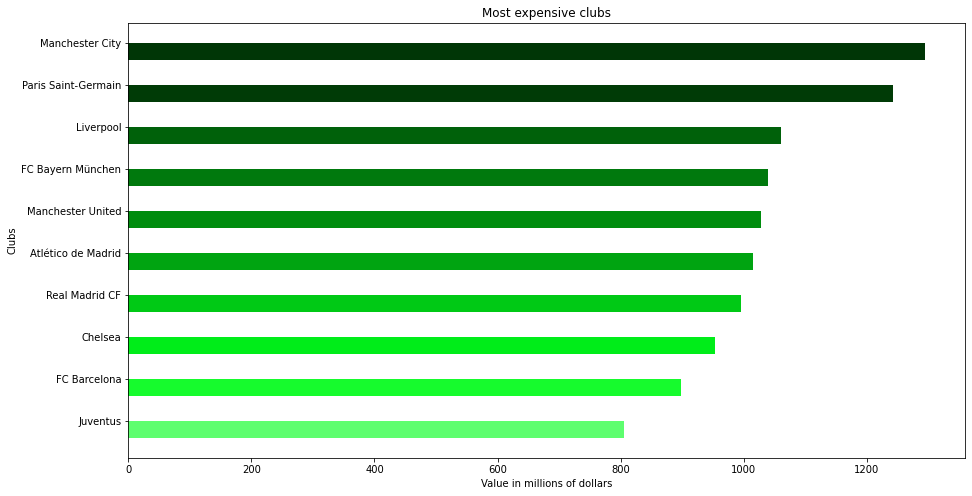

In [ ]:
# Create a new DataFrame of top clubs with most expensive players
top_clubs_expensive = data.groupby("Club",as_index=False)["Value(In Millions)"].sum().sort_values("Value(In Millions)", ascending=False).head(10)
# Plotting
colors = ["#003606","#003B06","#00610A","#00790D","#008C0E","#00A411","#00C915","#00ED19","#16FB2D","#5EFE6F"]
plt.barh("Club",width="Value(In Millions)",height=0.4, data=top_clubs_expensive,align="edge", color=colors)
plt.gca().invert_yaxis()
plt.title("Most expensive clubs")
plt.ylabel("Clubs")
plt.xlabel("Value in millions of dollars");

* **Top clubs with most expensive release clauses:**

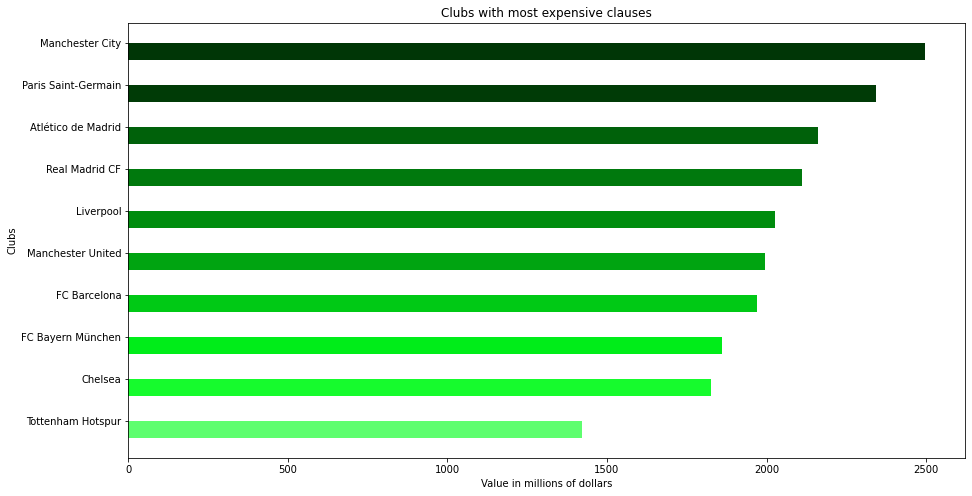

In [ ]:
# Create a new DataFrame of top clubs with the most expensive release clauses
top_clubs_clauses = data.groupby("Club",as_index=False)["Release Clause(In Millions)"].sum().sort_values("Release Clause(In Millions)", ascending=False).head(10)
# Plotting
colors = ["#003606","#003B06","#00610A","#00790D","#008C0E","#00A411","#00C915","#00ED19","#16FB2D","#5EFE6F"]
plt.barh("Club",width="Release Clause(In Millions)",height=0.4, data=top_clubs_clauses,align="edge", color=colors)
plt.gca().invert_yaxis()
plt.title("Clubs with most expensive clauses")
plt.ylabel("Clubs")
plt.xlabel("Value in millions of dollars");

* **Comparison of Overall rating Vs Market value:**

In [ ]:
import plotly.express as px
fig = px.scatter(data, x='Value(In Millions)', y='Overall', color='Age', size = 'Wage(In Thousands)', hover_data=['Name'])
fig.show()

* **Attributes of top 10 players:**

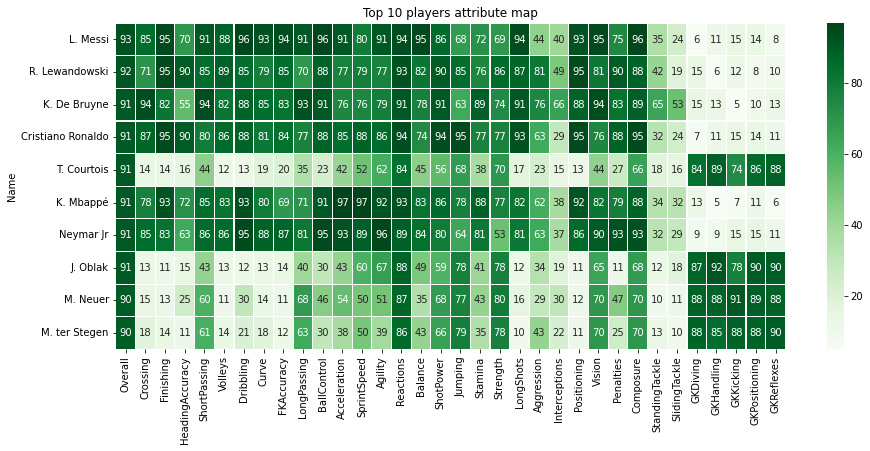

In [ ]:
heatmap_df = data.loc[:,['Name','Overall','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].sort_values("Overall",ascending=False).set_index("Name").head(10)
plt.title("Top 10 players attribute map")
sns.heatmap(heatmap_df, annot=True, cmap="Greens", xticklabels=True, linewidths=0.1);
fig = plt.gcf()
fig.set_size_inches(15, 6)